In [1]:
#TA: Collin, Baha
#Members: Ameen, Aneesh, Ankith, Abdulrahman

#Project Description:
"""
NBA Contract Prediction

"""

'\nNBA Contract Prediction\n\n'

In [2]:
import pandas as pd # Importing pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url = "https://www.spotrac.com/nba/contracts/"
kaggle_data= pd.read_csv('/work/nba-player-data.csv')
tables = pd.read_html(url)
contracts_df = tables[0]

#In this cell we read in the url and web scrape to get the data on NBA players contracts
#We also want to read in the csv file because we are merging two datasets
#Finally we create a dataframe 

In [4]:
contracts_df.head() #Looking at the head of the data frame to see what needs to be done

,Rank,Player,Pos,Team Currently With,Age At Signing,Start,End,Yrs,Value,AAV
0,1,Jayson Tatum,PF,BOS BOS,26,2025,2029,5,"$313,933,410","$62,786,682"
1,2,Jaylen Brown,SF,BOS BOS,26,2024,2028,5,"$285,393,640","$57,078,728"
2,3,Nikola Jokic,C,DEN DEN,27,2023,2027,5,"$276,122,630","$55,224,526"
3,4,Bradley Beal,SG,PHX PHX,29,2022,2026,5,"$251,019,650","$50,203,930"
4,T5,Tyrese Haliburton,PG,IND IND,23,2024,2028,5,"$244,623,120","$48,924,624"


In [5]:
 #cleaning the data by making the Team currently with column to only say the name once
 contracts_df.iloc[:,3] = contracts_df.iloc[:, 3].str.split(' ').str[0]

In [6]:
contracts_df['player_for_team'] = contracts_df.iloc[:,1] +  contracts_df.iloc[:,3]
contracts_df
# Combining the second and forth column using iloc or index location because the names of the columns are a bit iffy

,Rank,Player,Pos,Team Currently With,Age At Signing,Start,End,Yrs,Value,AAV,player_for_team
0,1,Jayson Tatum,PF,BOS,26,2025,2029,5,"$313,933,410","$62,786,682",Jayson TatumBOS
1,2,Jaylen Brown,SF,BOS,26,2024,2028,5,"$285,393,640","$57,078,728",Jaylen BrownBOS
2,3,Nikola Jokic,C,DEN,27,2023,2027,5,"$276,122,630","$55,224,526",Nikola JokicDEN
3,4,Bradley Beal,SG,PHX,29,2022,2026,5,"$251,019,650","$50,203,930",Bradley BealPHX
4,T5,Tyrese Haliburton,PG,IND,23,2024,2028,5,"$244,623,120","$48,924,624",Tyrese HaliburtonIND
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luguentz Dort,SG,OKC,23,2022,2026,5,"$82,500,000","$16,500,000",Luguentz DortOKC
96,97,Josh Hart,SG,NYK,28,2024,2027,4,"$80,915,280","$20,228,820",Josh HartNYK
97,98,Lonzo Ball,PG,CHI,23,2021,2024,4,"$80,000,000","$20,000,000",Lonzo BallCHI
98,99,Jakob Poeltl,C,TOR,27,2023,2026,4,"$78,000,000","$19,500,000",Jakob PoeltlTOR


In [7]:
contracts_df

,Rank,Player,Pos,Team Currently With,Age At Signing,Start,End,Yrs,Value,AAV,player_for_team
0,1,Jayson Tatum,PF,BOS,26,2025,2029,5,"$313,933,410","$62,786,682",Jayson TatumBOS
1,2,Jaylen Brown,SF,BOS,26,2024,2028,5,"$285,393,640","$57,078,728",Jaylen BrownBOS
2,3,Nikola Jokic,C,DEN,27,2023,2027,5,"$276,122,630","$55,224,526",Nikola JokicDEN
3,4,Bradley Beal,SG,PHX,29,2022,2026,5,"$251,019,650","$50,203,930",Bradley BealPHX
4,T5,Tyrese Haliburton,PG,IND,23,2024,2028,5,"$244,623,120","$48,924,624",Tyrese HaliburtonIND
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luguentz Dort,SG,OKC,23,2022,2026,5,"$82,500,000","$16,500,000",Luguentz DortOKC
96,97,Josh Hart,SG,NYK,28,2024,2027,4,"$80,915,280","$20,228,820",Josh HartNYK
97,98,Lonzo Ball,PG,CHI,23,2021,2024,4,"$80,000,000","$20,000,000",Lonzo BallCHI
98,99,Jakob Poeltl,C,TOR,27,2023,2026,4,"$78,000,000","$19,500,000",Jakob PoeltlTOR


In [8]:
kaggle_data #Viewing the kaggle data 

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
732,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
733,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
734,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [9]:
kaggle_data['player_on_team'] = kaggle_data['Player'] + kaggle_data['Tm'] #Creating a new column called player_on_team

In [10]:
kaggle_data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,player_on_team
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,Precious AchiuwaTOT
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,Precious AchiuwaTOR
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,Precious AchiuwaNYK
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,Bam AdebayoMIA
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,Ochai AgbajiTOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,Thaddeus YoungPHO
732,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,Trae YoungATL
733,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,Omer YurtsevenUTA
734,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,Cody ZellerNOP


In [11]:
#merging the two dataframes kaggle_data and contracts_df
merge_df = contracts_df.merge(kaggle_data, left_on='player_for_team', right_on='player_on_team', how='inner')

In [12]:
merge_df.drop(['player_for_team', 'player_on_team'], axis=1, inplace=True)
merge_df
#Dropping player_for_team and player_on_team

,Rank,Player_x,Pos_x,Team Currently With,Age At Signing,Start,End,Yrs,Value,AAV,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Jayson Tatum,PF,BOS,26,2025,2029,5,"$313,933,410","$62,786,682",...,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
1,T43,Jayson Tatum,PF,BOS,22,2021,2025,5,"$163,000,300","$32,600,060",...,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
2,2,Jaylen Brown,SF,BOS,26,2024,2028,5,"$285,393,640","$57,078,728",...,.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0
3,T5,Tyrese Haliburton,PG,IND,23,2024,2028,5,"$244,623,120","$48,924,624",...,.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1
4,T5,Anthony Edwards,SG,MIN,21,2024,2028,5,"$244,623,120","$48,924,624",...,.836,0.7,4.8,5.4,5.1,1.3,0.5,3.1,1.8,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,95,Dillon Brooks,SF,HOU,27,2023,2026,4,"$86,000,001","$21,500,000",...,.844,0.7,2.7,3.4,1.7,0.9,0.1,1.2,3.3,12.7
79,96,Luguentz Dort,SG,OKC,23,2022,2026,5,"$82,500,000","$16,500,000",...,.826,0.9,2.7,3.6,1.4,0.9,0.6,0.9,2.9,10.9
80,97,Josh Hart,SG,NYK,28,2024,2027,4,"$80,915,280","$20,228,820",...,.791,1.6,6.8,8.3,4.1,0.9,0.3,1.5,2.1,9.4
81,99,Jakob Poeltl,C,TOR,27,2023,2026,4,"$78,000,000","$19,500,000",...,.551,2.9,5.7,8.6,2.5,0.7,1.5,1.5,3.0,11.1


In [13]:
#Dropping repetive columns
merge_df = merge_df.drop(['Player_y', 'Pos_y'], axis=1)

In [14]:
merge_df

,Rank,Player_x,Pos_x,Team Currently With,Age At Signing,Start,End,Yrs,Value,AAV,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Jayson Tatum,PF,BOS,26,2025,2029,5,"$313,933,410","$62,786,682",...,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
1,T43,Jayson Tatum,PF,BOS,22,2021,2025,5,"$163,000,300","$32,600,060",...,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
2,2,Jaylen Brown,SF,BOS,26,2024,2028,5,"$285,393,640","$57,078,728",...,.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0
3,T5,Tyrese Haliburton,PG,IND,23,2024,2028,5,"$244,623,120","$48,924,624",...,.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1
4,T5,Anthony Edwards,SG,MIN,21,2024,2028,5,"$244,623,120","$48,924,624",...,.836,0.7,4.8,5.4,5.1,1.3,0.5,3.1,1.8,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,95,Dillon Brooks,SF,HOU,27,2023,2026,4,"$86,000,001","$21,500,000",...,.844,0.7,2.7,3.4,1.7,0.9,0.1,1.2,3.3,12.7
79,96,Luguentz Dort,SG,OKC,23,2022,2026,5,"$82,500,000","$16,500,000",...,.826,0.9,2.7,3.6,1.4,0.9,0.6,0.9,2.9,10.9
80,97,Josh Hart,SG,NYK,28,2024,2027,4,"$80,915,280","$20,228,820",...,.791,1.6,6.8,8.3,4.1,0.9,0.3,1.5,2.1,9.4
81,99,Jakob Poeltl,C,TOR,27,2023,2026,4,"$78,000,000","$19,500,000",...,.551,2.9,5.7,8.6,2.5,0.7,1.5,1.5,3.0,11.1


In [15]:
merge_df = merge_df.rename({'Player_x': 'Player', 'Pos_x': 'Pos',}, axis = 1)

In [16]:
merge_df

,Rank,Player,Pos,Team Currently With,Age At Signing,Start,End,Yrs,Value,AAV,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Jayson Tatum,PF,BOS,26,2025,2029,5,"$313,933,410","$62,786,682",...,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
1,T43,Jayson Tatum,PF,BOS,22,2021,2025,5,"$163,000,300","$32,600,060",...,.833,0.9,7.2,8.1,4.9,1.0,0.6,2.5,2.0,26.9
2,2,Jaylen Brown,SF,BOS,26,2024,2028,5,"$285,393,640","$57,078,728",...,.703,1.2,4.3,5.5,3.6,1.2,0.5,2.4,2.6,23.0
3,T5,Tyrese Haliburton,PG,IND,23,2024,2028,5,"$244,623,120","$48,924,624",...,.855,0.5,3.4,3.9,10.9,1.2,0.7,2.3,1.1,20.1
4,T5,Anthony Edwards,SG,MIN,21,2024,2028,5,"$244,623,120","$48,924,624",...,.836,0.7,4.8,5.4,5.1,1.3,0.5,3.1,1.8,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,95,Dillon Brooks,SF,HOU,27,2023,2026,4,"$86,000,001","$21,500,000",...,.844,0.7,2.7,3.4,1.7,0.9,0.1,1.2,3.3,12.7
79,96,Luguentz Dort,SG,OKC,23,2022,2026,5,"$82,500,000","$16,500,000",...,.826,0.9,2.7,3.6,1.4,0.9,0.6,0.9,2.9,10.9
80,97,Josh Hart,SG,NYK,28,2024,2027,4,"$80,915,280","$20,228,820",...,.791,1.6,6.8,8.3,4.1,0.9,0.3,1.5,2.1,9.4
81,99,Jakob Poeltl,C,TOR,27,2023,2026,4,"$78,000,000","$19,500,000",...,.551,2.9,5.7,8.6,2.5,0.7,1.5,1.5,3.0,11.1


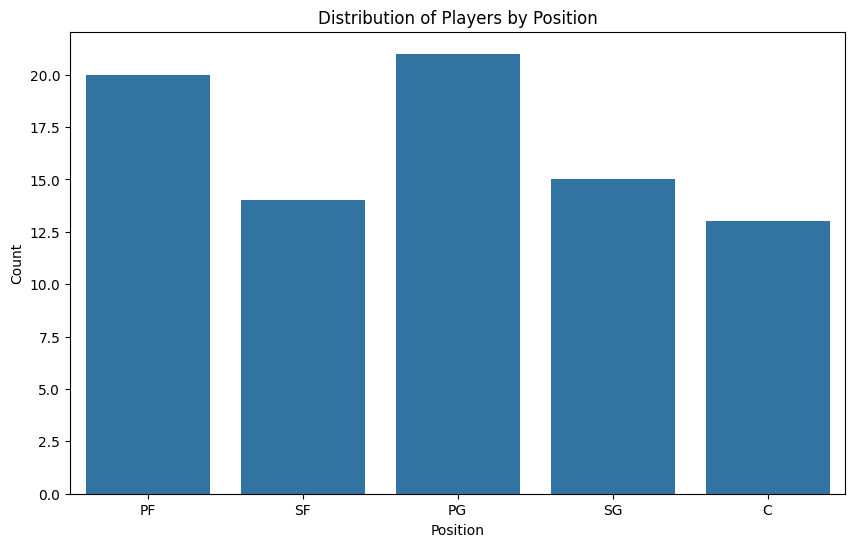

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merge_df, x='Pos')
plt.title('Distribution of Players by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()
#Bar chart showing the distribution of players by the position that they play

# Hypothesis Testing: 

Null Hypothesis: Previous season performance has no significant effect on the salary of NBA players in future seasons and NBA player salaries in future seasons is due to chance.

Alternative Hypothesis: Previous season performance metrics have a significant effect on the salary of NBA players in future seasons and that the relationship is not due to chance.

In [18]:
avg_points_with_salary = merge_df[["PTS", "AAV"]]
avg_points_with_salary["AAV"] = avg_points_with_salary["AAV"].str.replace("$", "").str.replace(",", "").astype(int)
avg_points_with_salary["PTS"] = avg_points_with_salary["PTS"].astype(float)
avg_points_with_salary

/tmp/ipykernel_52/4289100094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_points_with_salary["AAV"] = avg_points_with_salary["AAV"].str.replace("$", "").str.replace(",", "").astype(int)
/tmp/ipykernel_52/4289100094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_points_with_salary["PTS"] = avg_points_with_salary["PTS"].astype(float)


,PTS,AAV
0,26.9,62786682
1,26.9,32600060
2,23.0,57078728
3,20.1,48924624
4,25.9,48924624
...,...,...
78,12.7,21500000
79,10.9,16500000
80,9.4,20228820
81,11.1,19500000


In [19]:
avg_points_with_salary.sample(n = 83, replace=True)

,PTS,AAV
70,8.6,25000000
48,23.7,49835267
72,15.1,31000000
58,25.6,40000000
32,16.7,35859950
...,...,...
59,15.2,29512000
82,15.4,19493827
43,20.8,31650600
18,21.2,31650600


In [20]:
pts_vector = avg_points_with_salary["PTS"] - np.mean(avg_points_with_salary["PTS"])
aav_vector = avg_points_with_salary["AAV"] - np.mean(avg_points_with_salary["AAV"])
dot_prod = np.dot(pts_vector, aav_vector)
len_points = np.linalg.norm(pts_vector)
len_aav = np.linalg.norm(aav_vector)
r = dot_prod/(len_points * len_aav)
r

def correlation(col1, col2) :
    col1_vector = col1 - np.mean(col1)
    col2_vector = col2 - np.mean(col2)
    dot = np.dot(col1_vector, col2_vector)
    len_col1 = np.linalg.norm(col1_vector)
    len_col2 = np.linalg.norm(col2_vector)
    return dot/(len_col1 * len_col2)
    
avg_sal = np.array([])
for i in np.arange(5000):
    avg_points_with_salary.sample(n = 83, replace=True)
    cor = correlation(avg_points_with_salary["PTS"], avg_points_with_salary["AAV"])
    avg_sal = np.append(avg_sal, cor)
    
left_end= np.percentile(avg_sal, 2.5)
right_end= np.percentile(avg_sal, 97.5)

0 > left_end

False

Conclusion: With our test statistic, we have found that 0 does not fall into the 95% confidence interval, so the P value of getting 0 is less then 5 percent, therefore we can reject the null hypothesis. 

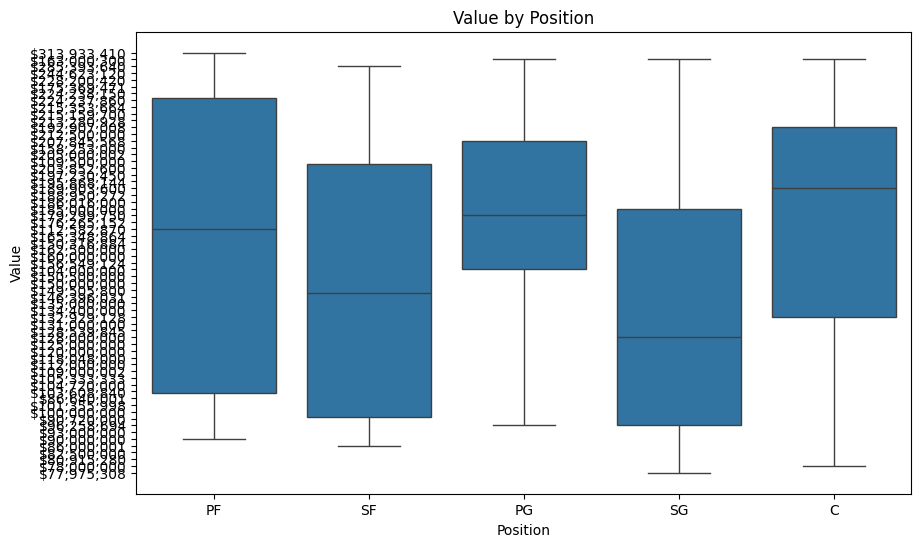

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_df, x='Pos', y='Value')
plt.title('Value by Position')
plt.xlabel('Position')
plt.ylabel('Value')
plt.show()
#Value by position box plot

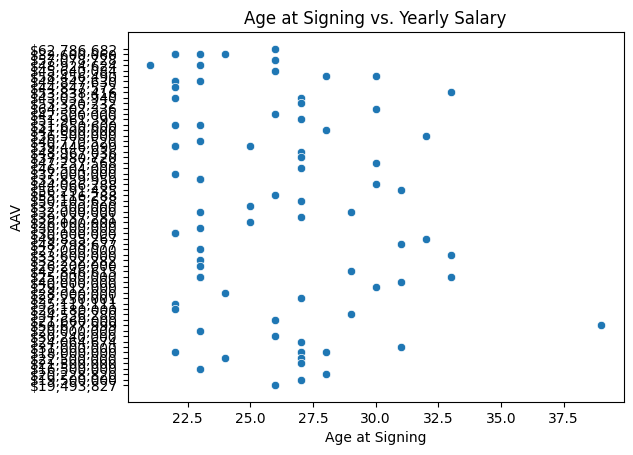

In [22]:
sns.scatterplot(data=merge_df, x='Age  At Signing', y='AAV')
plt.title('Age at Signing vs. Yearly Salary')
plt.xlabel('Age at Signing')
plt.ylabel('AAV')
plt.show()
#Scatter plot to show the age of the player at signing vs their yearly salary

In [23]:
train_df = merge_df.loc[:, ["PTS", "AAV", "FGA", "FG", "3PA","2PA", "FTA","FT","TRB", "AST", "STL", "BLK", "TOV", "PF", "MP", "TOV", "GS"]]
train_df

,PTS,AAV,FGA,FG,3PA,2PA,FTA,FT,TRB,AST,STL,BLK,TOV,PF,MP,TOV,GS
0,26.9,"$62,786,682",19.3,9.1,8.2,11.0,6.7,5.6,8.1,4.9,1.0,0.6,2.5,2.0,35.7,2.5,74
1,26.9,"$32,600,060",19.3,9.1,8.2,11.0,6.7,5.6,8.1,4.9,1.0,0.6,2.5,2.0,35.7,2.5,74
2,23.0,"$57,078,728",17.9,9.0,5.9,12.1,4.3,3.0,5.5,3.6,1.2,0.5,2.4,2.6,33.5,2.4,70
3,20.1,"$48,924,624",15.2,7.2,7.8,7.4,3.3,2.8,3.9,10.9,1.2,0.7,2.3,1.1,32.2,2.3,68
4,25.9,"$48,924,624",19.7,9.1,6.7,13.0,6.4,5.4,5.4,5.1,1.3,0.5,3.1,1.8,35.1,3.1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,12.7,"$21,500,000",10.7,4.6,5.1,5.5,2.0,1.7,3.4,1.7,0.9,0.1,1.2,3.3,30.9,1.2,72
79,10.9,"$16,500,000",8.3,3.6,5.0,3.3,2.0,1.6,3.6,1.4,0.9,0.6,0.9,2.9,28.4,0.9,79
80,9.4,"$20,228,820",8.4,3.6,3.2,5.2,1.4,1.1,8.3,4.1,0.9,0.3,1.5,2.1,33.4,1.5,42
81,11.1,"$19,500,000",7.6,5.0,0.0,7.6,2.1,1.2,8.6,2.5,0.7,1.5,1.5,3.0,26.4,1.5,50


In [24]:
train_df["AAV"] = train_df["AAV"].str.replace(",", "").str.replace("$", "")

In [25]:
train_df = train_df.astype(float)
train_df

,PTS,AAV,FGA,FG,3PA,2PA,FTA,FT,TRB,AST,STL,BLK,TOV,PF,MP,TOV,GS
0,26.9,62786682.0,19.3,9.1,8.2,11.0,6.7,5.6,8.1,4.9,1.0,0.6,2.5,2.0,35.7,2.5,74.0
1,26.9,32600060.0,19.3,9.1,8.2,11.0,6.7,5.6,8.1,4.9,1.0,0.6,2.5,2.0,35.7,2.5,74.0
2,23.0,57078728.0,17.9,9.0,5.9,12.1,4.3,3.0,5.5,3.6,1.2,0.5,2.4,2.6,33.5,2.4,70.0
3,20.1,48924624.0,15.2,7.2,7.8,7.4,3.3,2.8,3.9,10.9,1.2,0.7,2.3,1.1,32.2,2.3,68.0
4,25.9,48924624.0,19.7,9.1,6.7,13.0,6.4,5.4,5.4,5.1,1.3,0.5,3.1,1.8,35.1,3.1,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,12.7,21500000.0,10.7,4.6,5.1,5.5,2.0,1.7,3.4,1.7,0.9,0.1,1.2,3.3,30.9,1.2,72.0
79,10.9,16500000.0,8.3,3.6,5.0,3.3,2.0,1.6,3.6,1.4,0.9,0.6,0.9,2.9,28.4,0.9,79.0
80,9.4,20228820.0,8.4,3.6,3.2,5.2,1.4,1.1,8.3,4.1,0.9,0.3,1.5,2.1,33.4,1.5,42.0
81,11.1,19500000.0,7.6,5.0,0.0,7.6,2.1,1.2,8.6,2.5,0.7,1.5,1.5,3.0,26.4,1.5,50.0


In [26]:
pd.Series(np.abs(train_df.corr()["AAV"])).sort_values(ascending = False)[1:4]

PTS    0.642257
FG     0.627281
FT     0.610330
Name: AAV, dtype: float64

In [27]:
"""
train_df['FT'] = train_df['FT'].astype(float)
real_train_df = train_df[["PTS", "FG", "FT"]]
real_train_df = train_df[train_df["
["FT"] <= 8]
real_train_df
label_df = train_df["AAV"]
"""
train_df['FT'] = train_df['FT'].astype(float)
real_train_df = train_df[["PTS", "FG", "FT"]]
real_train_df = real_train_df[real_train_df["FT"] <= 8]
label_df = train_df["AAV"]

In [28]:
real_train_df

,PTS,FG,FT
0,26.9,9.1,5.6
1,26.9,9.1,5.6
2,23.0,9.0,3.0
3,20.1,7.2,2.8
4,25.9,9.1,5.4
...,...,...,...
78,12.7,4.6,1.7
79,10.9,3.6,1.6
80,9.4,3.6,1.1
81,11.1,5.0,1.2


<AxesSubplot: ylabel='FT'>

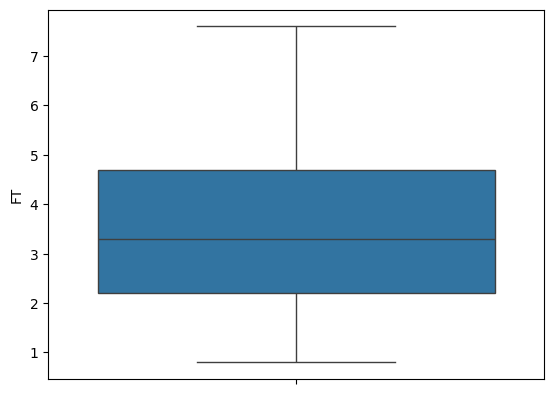

In [29]:
sns.boxplot(data = real_train_df, y = "FT")

In [30]:
real_train_df = real_train_df[real_train_df["FT"] <= 8]

#Drop the outlier
#Find new model Decision Tree or Random Forest

In [31]:
"""

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
lr = LinearRegression()
ridge_model = Ridge(alpha = 2)
lasso_model = Lasso(alpha = 4)
X_train, X_test, y_train, y_test = train_test_split(real_train_df, label_df, test_size = 0.1)

lr.fit(X_train, y_train)
train = lr.predict(X_train)
test = lr.predict(X_test)

ridge_model.fit(X_train, y_train)
ridge_train = ridge_model.predict(X_train)
ridge_test = ridge_model.predict(X_test)

lasso_model.fit(X_train, y_train)
lasso_train = lasso_model.predict(X_train)
lasso_test = lasso_model.predict(X_test)



print(np.linalg.norm(y_train - train))
print(np.linalg.norm(y_test - test))

"""
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
lr = LinearRegression()
ridge_model = Ridge(alpha = 2)
lasso_model = Lasso(alpha = 4)
real_train_df = real_train_df.dropna()
label_df = label_df.loc[real_train_df.index].dropna()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(real_train_df, label_df, test_size=0.1)

# Fit and predict with models
lr.fit(X_train, y_train)
train = lr.predict(X_train)
test = lr.predict(X_test)

ridge_model.fit(X_train, y_train)
ridge_train = ridge_model.predict(X_train)
ridge_test = ridge_model.predict(X_test)

lasso_model.fit(X_train, y_train)
lasso_train = lasso_model.predict(X_train)
lasso_test = lasso_model.predict(X_test)

print(np.linalg.norm(y_train - train))
print(np.linalg.norm(y_test - test))


75234097.37543868
28989351.083034806


Tune Linear Model:

Anomalies to watch out for: Why is it performing better on the test set. Try to investigate this. 

2 Regularization.  If your model gets too complicated it will not generalize well to your test data. Ridge regression. Instead of importing 

LinearRegression, import ridge. 

In [36]:
real_train_df

,PTS,FG,FT
0,26.9,9.1,5.6
1,26.9,9.1,5.6
2,23.0,9.0,3.0
3,20.1,7.2,2.8
4,25.9,9.1,5.4
...,...,...,...
78,12.7,4.6,1.7
79,10.9,3.6,1.6
80,9.4,3.6,1.1
81,11.1,5.0,1.2


Look for outliers in your training data and drop very large and very small values. 

Experiment using less features .

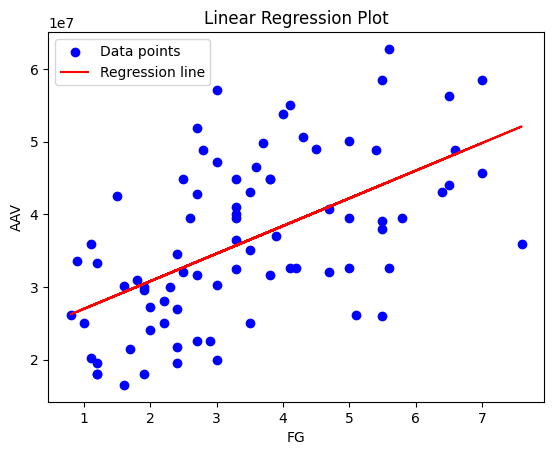

9351826.102854505

In [42]:
#Visualizing a Regression Line

X = real_train_df['FT'].values  
y = label_df #

model = LinearRegression()
X_reshaped = X.reshape(-1, 1)
model.fit(X_reshaped, y)
y_pred = model.predict(X_reshaped)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('FG')
plt.ylabel('AAV')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()


def rmse(expected, oberved):
    return np.sqrt(np.mean((expected-oberved)**2))
rmse(y, y_pred)


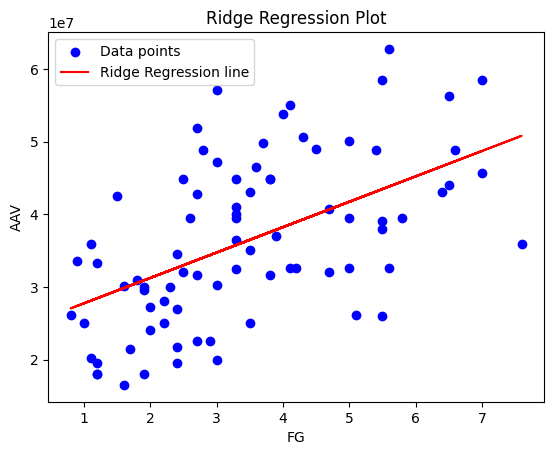

9366077.056149034

In [39]:
#Ridge Regression Line
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=20)  
ridge_model.fit(X_reshaped, y)
y_ridge_pred = ridge_model.predict(X_reshaped)

# Plotting
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_ridge_pred, color='red', label='Ridge Regression line')
plt.xlabel('FG')
plt.ylabel('AAV')
plt.title('Ridge Regression Plot')
plt.legend()
plt.show()


In [67]:
row_for_prediction = real_train_df.iloc[2].values.reshape(1, -1)
prediction = lasso_model.predict(row_for_prediction)
print("Jaylen Brown Future Contract (Prediction):", prediction)
print("Jaylen Brown Real Contract: ", merge_df.iloc[2]["AAV"])

Jaylen Brown Future Contract (Prediction): [39902568.10581607]
Jaylen Brown Real Contract:  $37,451,977
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [61]:
row_for_prediction = real_train_df.iloc[5].values.reshape(1, -1)
prediction = lasso_model.predict(row_for_prediction)
print("Jalen Green (Prediction):", prediction)
print("Jalen Green Real Contract: ", merge_df.iloc[5]["Value"])

Jalen Green (Prediction): [54072419.39231379]
Jalen Green Real Contract:  $228,200,420
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ce47c90-9dd2-4b89-ab43-be98edfa30ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>